In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

letters_df = pd.read_csv("letters.csv")
print(letters_df)

#No missing values, no categorical values for encoding
print(letters_df.isnull().sum())

       x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0          2      4      4     3      2      7      8      2      9     11   
1          4      7      5     5      5      5      9      6      4      8   
2          7     10      8     7      4      8      8      5     10     11   
3          4      9      5     7      4      7      7     13      1      7   
4          6      7      8     5      4      7      6      3      7     10   
...      ...    ...    ...   ...    ...    ...    ...    ...    ...    ...   
19995      5     10      5     8      3      4     10      7      8     12   
19996      4      7      6     5      3      7      8      2     10     12   
19997      4      8      4     6      4      7      8      7      4     10   
19998      4     11      4     8      3      0      2      4      6      1   
19999      5      9      6    11      6      8      7      6      3      8   

       x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx class  
0      

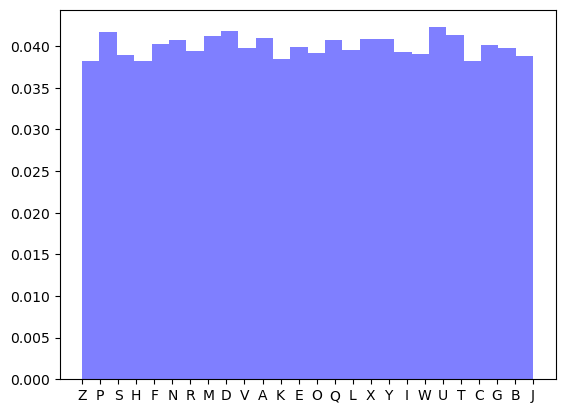

In [2]:
#2. Histogram for class to make sure letters are well represented
plt.hist(letters_df['class'], bins=26, density=True, alpha=0.5, color='b')
plt.show()
#Data is fairly well represented for each letter

In [3]:
#cross validation model

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def cross_validate_model (classifier_model, X, y):
    kfold = KFold(n_splits=3, shuffle=True, random_state=10)

               # perform model cross validation on the shuffled folds
    results = cross_val_score(classifier_model, X, y, cv=kfold)

              # return the mean score for all folds
    return results.mean()

In [4]:
#DecisionTree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

y_dt = letters_df['class']
X_dt = letters_df.drop('class', axis=1)

#change to numpy array
X_dt = X_dt.values
y_dt = y_dt.values

#create model
gini_model = DecisionTreeClassifier(criterion='gini')

#accuracy score after validation
print(cross_validate_model(gini_model, X_dt, y_dt))



0.8651999818250912


In [19]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=67)

y_rf = letters_df['class']
X_rf = letters_df.drop('class', axis=1)

#change to numpy array
X_rf = X_rf.values
y_rf = y_rf.values

#accuracy score after validation
print(cross_validate_model(rfc, X_rf, y_rf))

0.9577999497864891


In [6]:
#SVC

from sklearn.svm import SVC

svm = SVC(kernel='poly', decision_function_shape='ovr', C=1.0, probability=True)

y_svm = letters_df['class']
X_svm = letters_df.drop('class', axis=1)

X_svm = X_svm.values
y_svm = y_svm.values

#accuracy score after validation
print(cross_validate_model(svm, X_svm, y_svm))


0.9425498647059847


In [7]:
#SGD

from sklearn.linear_model import SGDClassifier

sgd_class = SGDClassifier(max_iter=1000, random_state=32)

y_sgd = letters_df['class']
X_sgd = letters_df.drop('class', axis=1)

X_sgd = X_sgd.values
y_sgd = y_sgd.values

print(cross_validate_model(sgd_class, X_sgd, y_sgd))

0.5022498425033745


In [55]:
#Extra Trees

from sklearn.ensemble import ExtraTreesClassifier

y_ext = letters_df['class']
X_ext = letters_df.drop('class', axis=1)

X_ext = X_ext.values
y_ext = y_ext.values

xtrees_model = ExtraTreesClassifier(n_estimators=100, random_state=19)

print(cross_validate_model(xtrees_model, X_ext, y_ext))

0.9664999573303663


In [21]:
#Voting

from sklearn.ensemble import VotingClassifier

#label classifiers
classifiers = [
    ('random_forest', rfc),
    ('decision_tree', gini_model),
    ('svm', svm),
    ('ext_trees', xtrees_model)
]

y_vot = letters_df['class']
X_vot = letters_df.drop('class', axis=1)

X_vot = X_vot.values
y_vot = y_vot.values

#create voting classifier using provided models
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

#create accuracy score for voting
print(cross_validate_model(voting_classifier, X_vot, y_vot))


0.9450500772291118


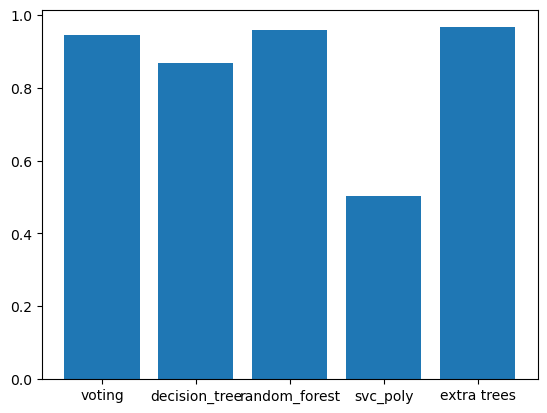

In [22]:
#plot models and their relative successes based on accuracy scores
accuracy_scores_models = ["voting", "decision_tree", "random_forest", "svc_poly", "extra trees"]
accuracy_values = [0.9450500772291118, 0.8668499818333415, 0.9577999497864891, 0.5022498425033745, 0.9664999573303663]

plt.bar(accuracy_scores_models, accuracy_values)
plt.show()

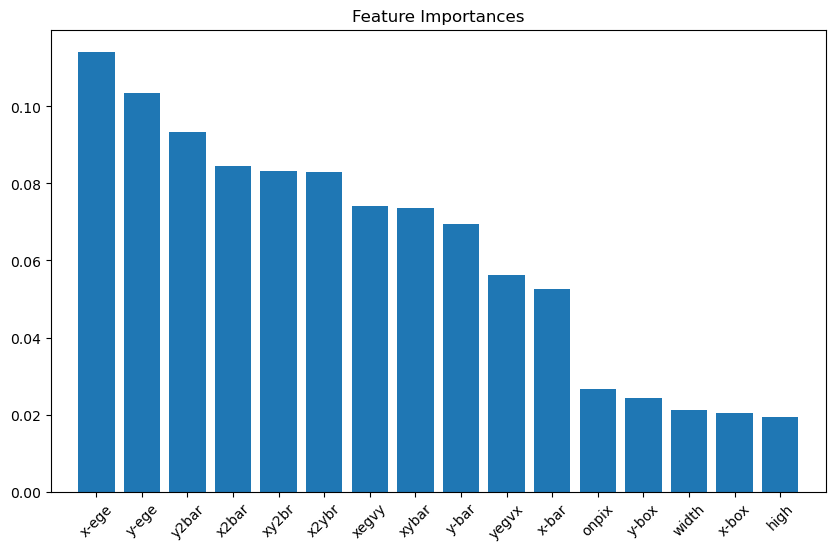

In [25]:


#Forest cross validate, q7 for tree models
rf_model = RandomForestClassifier(n_estimators=100, random_state=29)

y = letters_df['class']
X = letters_df.drop('class', axis=1)
X = X.values
y = y.values

# Fit the model
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Get the names of the features
blank = letters_df.drop('class', axis=1)
features = blank.columns.tolist()

#sort on descending order
indices = importances.argsort()[::-1]

# Plot the feature importances, enusre descending order for easier viewing of most important features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

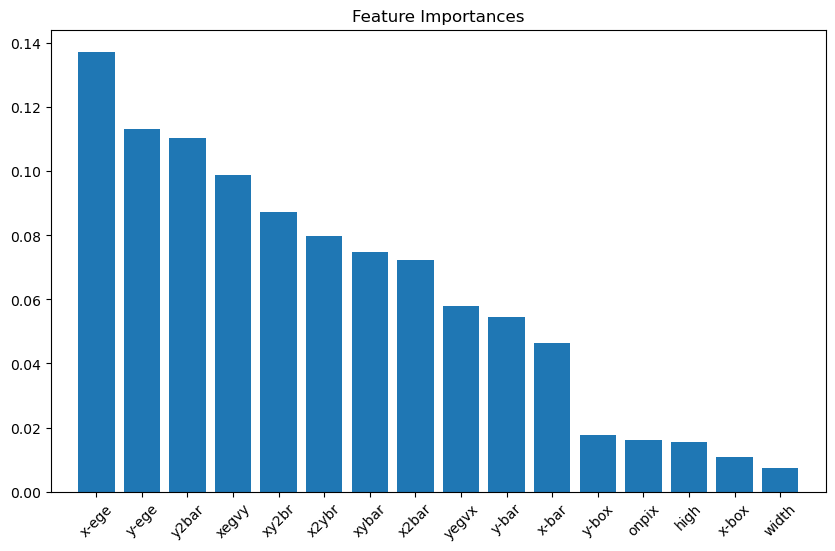

In [26]:
#Decision Tree feature importances

gini_model.fit(X, y)
importances = gini_model.feature_importances_

# Get the names of the features
blank = letters_df.drop('class', axis=1)
features = blank.columns.tolist()

# Sort the indices of importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

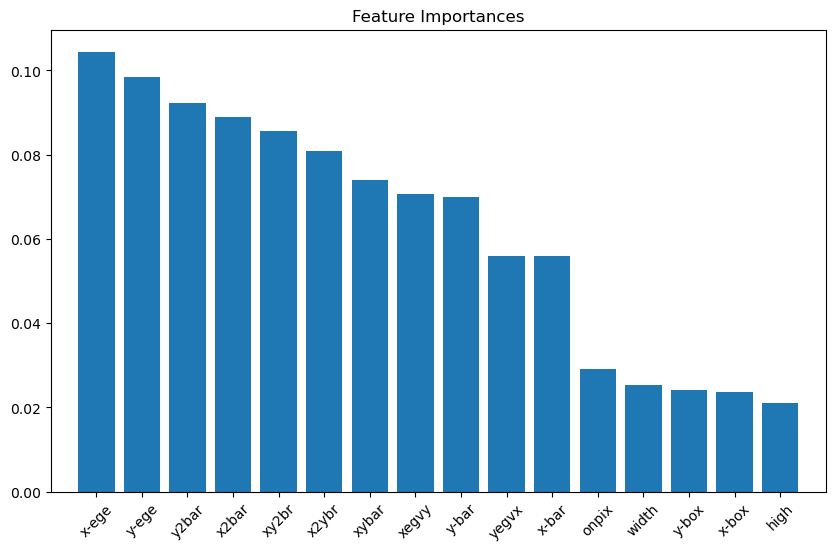

In [27]:
#Extra Trees feature importance

xtrees_model.fit(X, y)
importances = xtrees_model.feature_importances_

# Get the names of the features
blank = letters_df.drop('class', axis=1)
features = blank.columns.tolist()

# Sort the indices of importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()

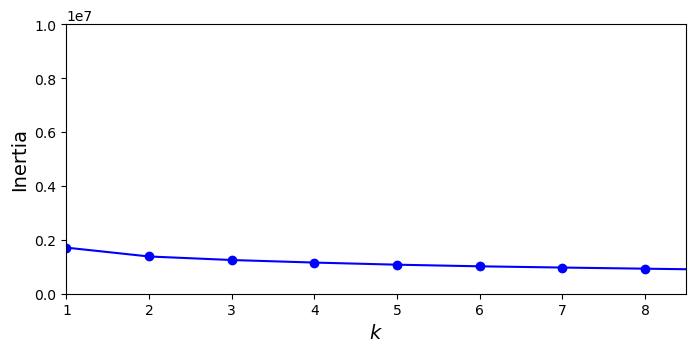

In [46]:
#Kmeans training, elbow and silhouette plot
#Code from notebook 7

from sklearn.cluster import KMeans

#26 clusters for 26 different letters
k = 26
kmeans = KMeans(n_clusters=k, random_state=42)
#y_pred = kmeans.fit_predict(X)
#Inertia for this prediction was incredibly high

#kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              #algorithm="full", random_state=2)
#kmeans_rnd_10_inits.fit(X)

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 8.5, 0, 10000000])
plt.show()

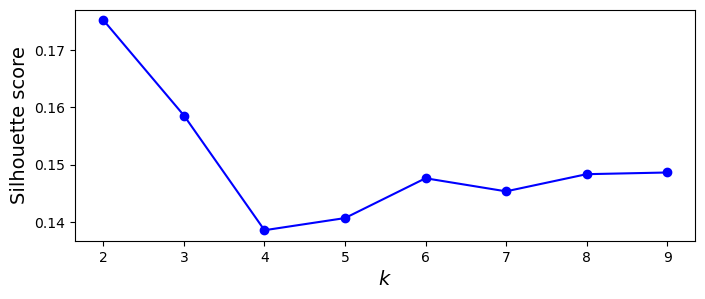

In [54]:
#Silhouette
#Code from notebook 7

from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()

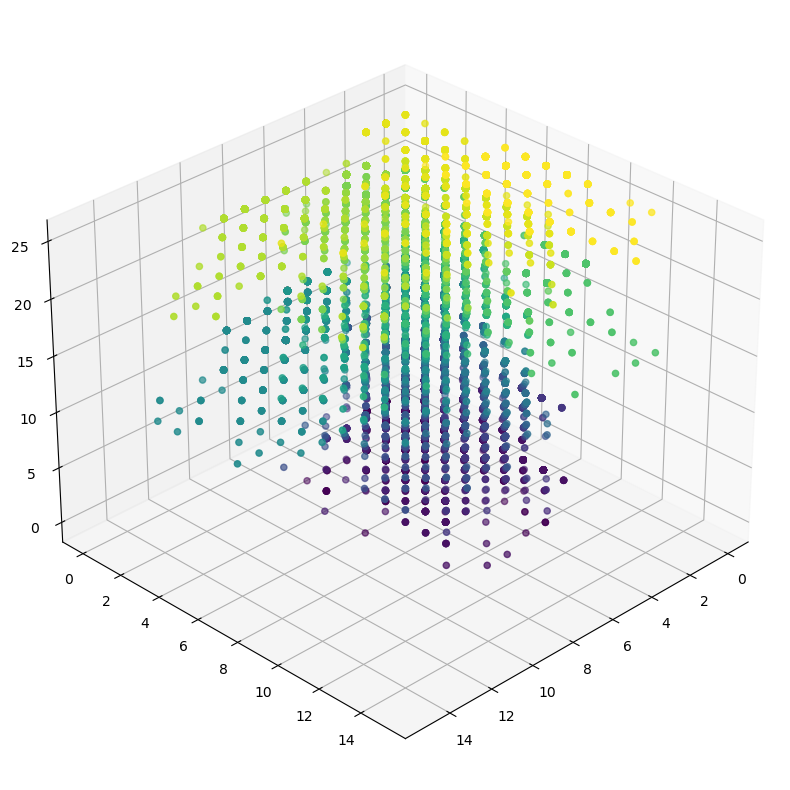

In [52]:
#3d plot
#two most influential features, x-ege, y-ege

from sklearn.preprocessing import OrdinalEncoder

encoder=OrdinalEncoder()

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

xdata = letters_df['x-ege']
ydata = letters_df['y-ege']

#I was not sure how to represent the class as the color. I decided to ordinally encode the class value, though I am
#sure that that was the intended path to follow. Will ask next meeting
letters_df[['class']]=encoder.fit_transform(letters_df[['class']])

zdata = letters_df['class']
xdata = xdata.values
ydata = ydata.values

# Set up data for three-dimensional scattered points; use the 26 labels for color map
ax.scatter3D(xdata, ydata, zdata, c=zdata)

# rotate the axes and update the view
ax.view_init(30, 45)
plt.draw()